In [67]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [68]:
data=pd.read_csv(r"C:\Users\thama\Downloads\Wine_clust.csv")

In [69]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [70]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# K MEANS CLUSTERING:

In [88]:
feature_set=data.iloc[:,3:5].values



<function matplotlib.pyplot.show(*args, **kw)>

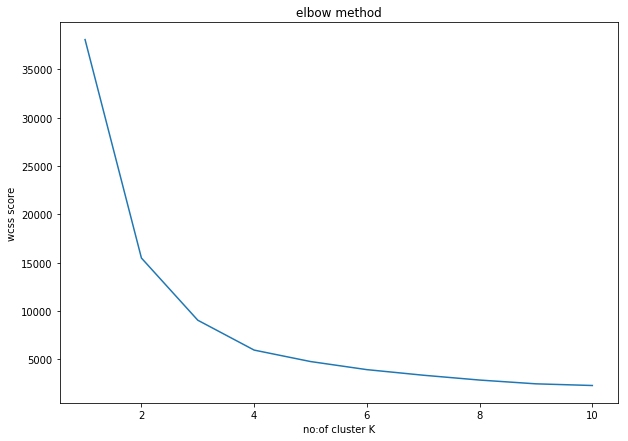

In [102]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init="k-means++",n_init=10,random_state=101)
    km.fit(feature_set)
    wcss.append(km.inertia_)
    
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title("elbow method")
plt.xlabel("no:of cluster K")
plt.ylabel("wcss score")
plt.show

# from the graph we cansay that 3 is the optimum no:of cluster

In [92]:
km=KMeans(n_clusters=3,init="k-means++",n_init=10,random_state=101)
km.fit(feature_set)
data['km_3']=km.labels_
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_3
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


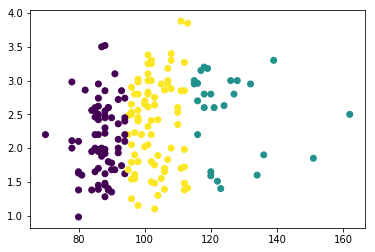

In [93]:
plt.scatter(x=data['Magnesium'],y=data['Total_Phenols'],c=data['km_3'])
plt.show()

In [108]:
feature_set1=data.iloc[:,5:7].values

<function matplotlib.pyplot.show(*args, **kw)>

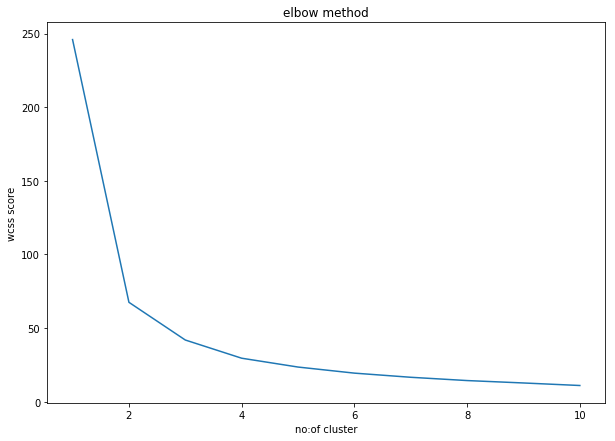

In [94]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init="k-means++",n_init=10,random_state=101)
    km.fit(feature_set1)
    wcss.append(km.inertia_)
    
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title("elbow method")
plt.xlabel("no:of cluster")
plt.ylabel("wcss score")
plt.show

In [104]:
km=KMeans(n_clusters=4,init="k-means++",n_init=10,random_state=101)
km.fit(feature_set1)
data['km_4']=km.labels_
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_3,km_4
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,0


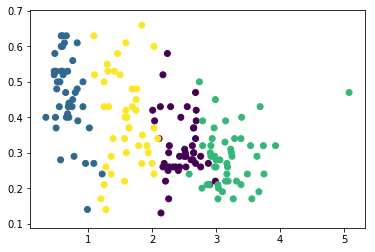

In [107]:
plt.scatter(x=data['Flavanoids'],y=data['Nonflavanoid_Phenols'],c=data['km_4'])
plt.show()


# HIERARCHY:

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [109]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data.loc[:,:]=sc.fit_transform(data)
data.describe().round(3)

C:\Users\thama\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\thama\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_3,km_4
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000
std,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003
min,-2.434,-1.433,-3.679,-2.671,-2.088,-2.107,-1.696,-1.868,-2.069,-1.634,-2.095,-1.895,-1.493,-1.296,-1.344
25%,-0.788,-0.659,-0.572,-0.689,-0.824,-0.885,-0.828,-0.740,-0.597,-0.795,-0.768,-0.952,-0.785,-1.296,-1.118
50%,0.061,-0.423,-0.024,0.002,-0.122,0.096,0.106,-0.176,-0.063,-0.159,0.033,0.238,-0.234,-0.056,0.461
75%,0.836,0.670,0.698,0.602,0.510,0.809,0.849,0.610,0.629,0.494,0.713,0.789,0.758,1.185,0.461
max,2.260,3.109,3.156,3.155,4.371,2.540,3.063,2.402,3.485,3.435,3.302,1.961,2.971,1.185,1.364


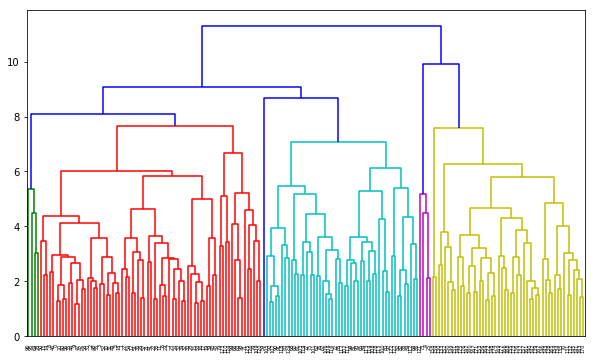

In [110]:
mergings=linkage(data,method="complete")
plt.figure(figsize=(10,6))
dendrogram(mergings,labels=data.index,leaf_rotation=90) 
plt.show()

In [111]:
mergings.shape

(177, 4)

In [112]:
from scipy.cluster.hierarchy import fcluster

In [113]:
labels=fcluster(mergings,8,criterion="distance")

In [114]:
pd.Series(labels).value_counts()

2    71
6    49
3    49
5     4
1     4
4     1
dtype: int64

# from the figure we can say that we can divide cluster from 8 to get optimum no:of cluster

# PCA:

In [41]:
data.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_4
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,0.138472
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.006120
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,0.177203
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.004459
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,0.483556
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,0.097102
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,0.108445
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,-0.107995
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,0.035817
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.171794


In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data.loc[:,:]=sc.fit_transform(data)
data.describe().round(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_4
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003
min,-2.434,-1.433,-3.679,-2.671,-2.088,-2.107,-1.696,-1.868,-2.069,-1.634,-2.095,-1.895,-1.493,-0.915
25%,-0.788,-0.659,-0.572,-0.689,-0.824,-0.885,-0.828,-0.740,-0.597,-0.795,-0.768,-0.952,-0.785,-0.915
50%,0.061,-0.423,-0.024,0.002,-0.122,0.096,0.106,-0.176,-0.063,-0.159,0.033,0.238,-0.234,-0.005
75%,0.836,0.670,0.698,0.602,0.510,0.809,0.849,0.610,0.629,0.494,0.713,0.789,0.758,-0.005
max,2.260,3.109,3.156,3.155,4.371,2.540,3.063,2.402,3.485,3.435,3.302,1.961,2.971,1.815


In [44]:
from sklearn.decomposition import PCA
pc=PCA(n_components=8)

In [45]:
pc_array=pc.fit_transform(data)
pc_array.shape

(178, 8)

In [46]:
tranc_data=pd.DataFrame(pc_array,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [47]:
tranc_data.corr().round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
PC1,1.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0
PC2,-0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
PC3,0.0,-0.0,1.0,0.0,0.0,0.0,0.0,0.0
PC4,0.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0
PC5,-0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.0
PC6,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,0.0
PC7,0.0,0.0,0.0,-0.0,0.0,-0.0,1.0,-0.0
PC8,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,1.0


In [49]:
pc.explained_variance_ratio_

array([0.33697809, 0.18620836, 0.10582234, 0.08370465, 0.06510961,
       0.0458846 , 0.04179887, 0.03923398])

3 IS OPTIMUM SINCE IT CONTAIN MOST PERCENTAGE OF DATA

In [50]:
from sklearn.decomposition import PCA
pc=PCA(n_components=3)

In [51]:
pc_array=pc.fit_transform(data)
pc_array.shape

(178, 3)

In [52]:
tranc_data=pd.DataFrame(pc_array,columns=['PC1','PC2','PC3'])

In [53]:
tranc_data.corr().round(2)

,PC1,PC2,PC3
PC1,1.0,-0.0,0.0
PC2,-0.0,1.0,-0.0
PC3,0.0,-0.0,1.0


In [54]:
pc.explained_variance_ratio_*100

array([33.69780922, 18.62083555, 10.58223413])

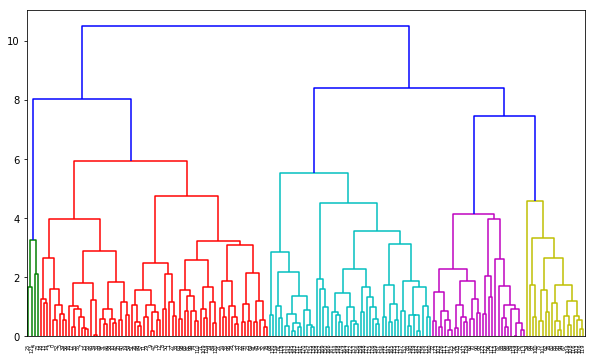

In [157]:
mergings=linkage(tranc_data,method='complete')
plt.figure(figsize=(10,6))
dendrogram(mergings,labels=data.index,leaf_rotation=90)
plt.show()

# DBSCAN:

In [153]:
from sklearn.cluster import DBSCAN

In [154]:
clustering=DBSCAN(eps=3,min_samples=26).fit(data)

In [155]:
clustering.labels_

array([ 0, -1,  0,  0, -1,  0, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1,  0,  0, -1,  0,
       -1,  0,  0, -1, -1,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

from above we can understand that the values are clusterd into 3 clusters which is represented by -1,0 and 1